In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("D:\\Data science\\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df1=df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.describe()


,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [6]:
df[df.duplicated()].shape


(0, 2)

In [7]:
df[df.duplicated()]


,Delivery Time,Sorting Time


In [8]:
df=df.drop_duplicates().reset_index(drop=True)


In [9]:
df[df.duplicated()]


,Delivery Time,Sorting Time


In [10]:
df[df.values==0.0]
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

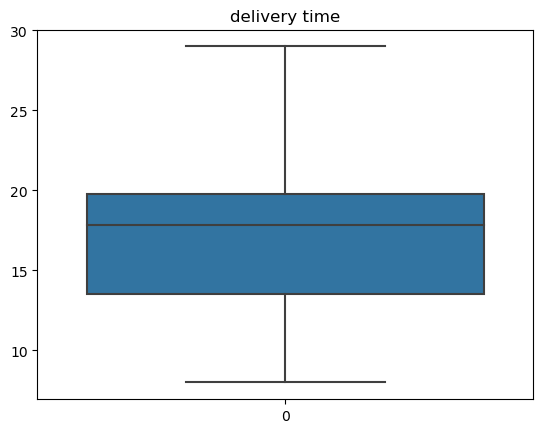

In [11]:
#boxplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['Delivery Time'])
plt.title('delivery time')
plt.show()

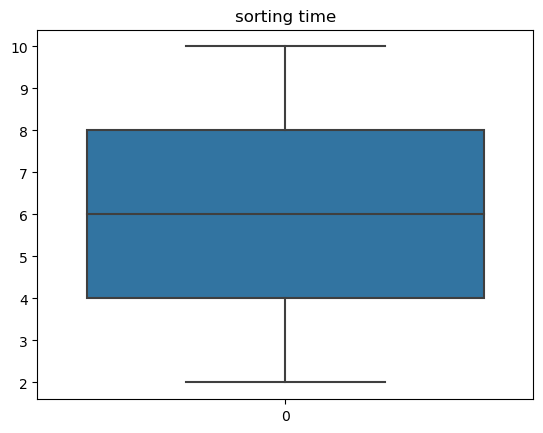

In [12]:
sns.boxplot(df['Sorting Time'])
plt.title('sorting time')
plt.show()

In [13]:
#calculating correlation
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


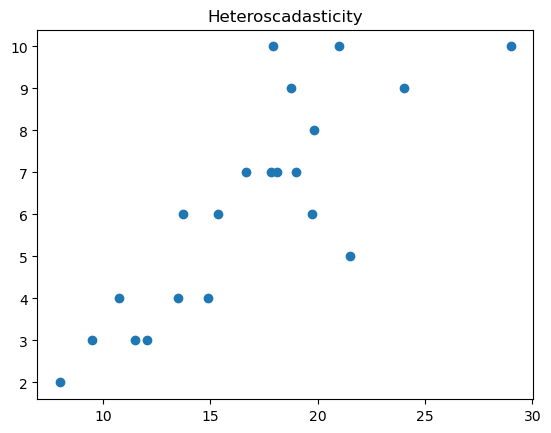

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df['Delivery Time'],df['Sorting Time'])
plt.title('Heteroscadasticity')
plt.show()

<Axes: >

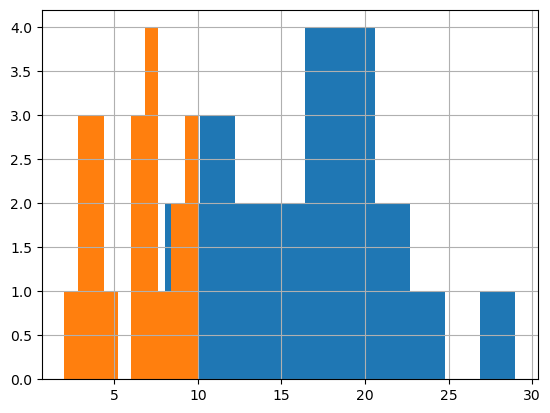

In [15]:
#histogram
df['Delivery Time'].hist()
df['Sorting Time'].hist()

Text(0.5, 1.0, 'after transformation')

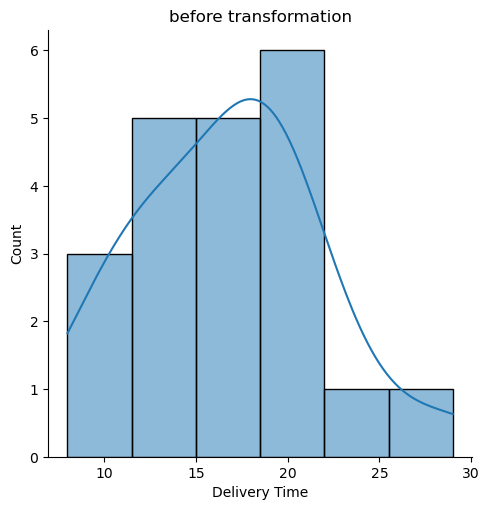

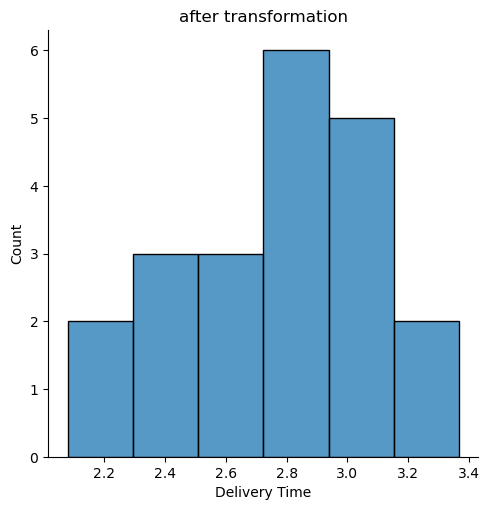

In [16]:
#for delivery time applying transformaton
sns.displot(df['Delivery Time'],bins=6,kde=True)
plt.title('before transformation')
sns.displot(np.log(df['Delivery Time']))
plt.title('after transformation')


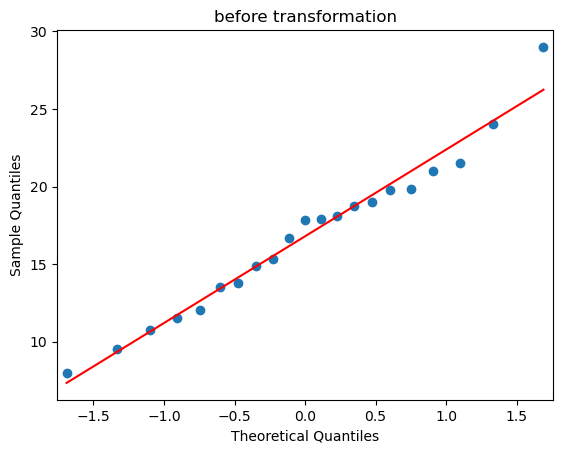

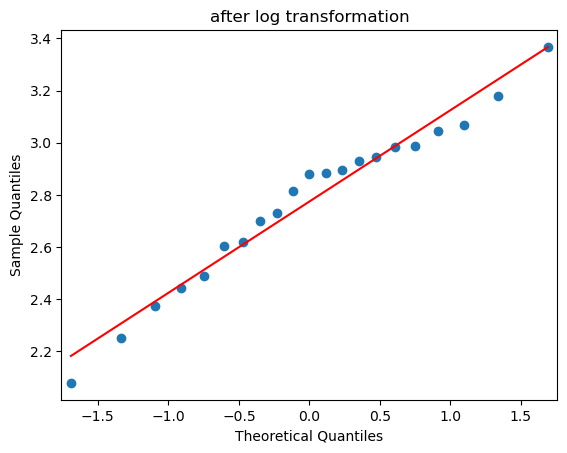

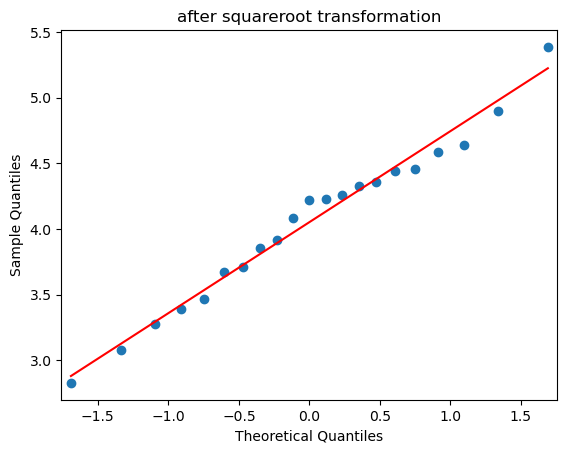

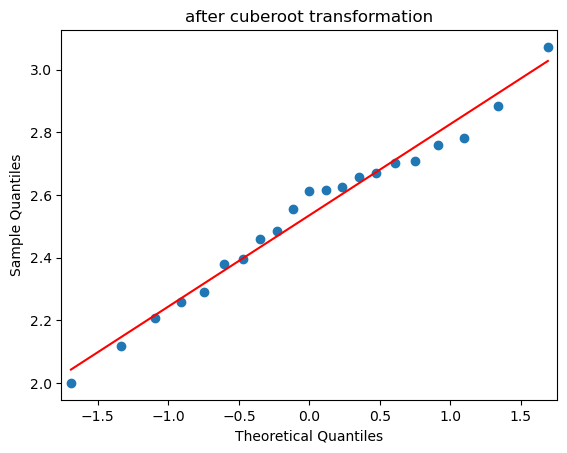

In [17]:
import statsmodels.formula.api as smf
import statsmodels.api as smf
smf.qqplot(df['Delivery Time'],line='r')
plt.title('before transformation')
smf.qqplot(np.log(df['Delivery Time']),line='r')
plt.title('after log transformation')
smf.qqplot(np.sqrt(df['Delivery Time']),line='r')
plt.title('after squareroot transformation')
smf.qqplot(np.cbrt(df['Delivery Time']),line='r')
plt.title('after cuberoot transformation')
plt.show()

Text(0.5, 1.0, 'after transformation')

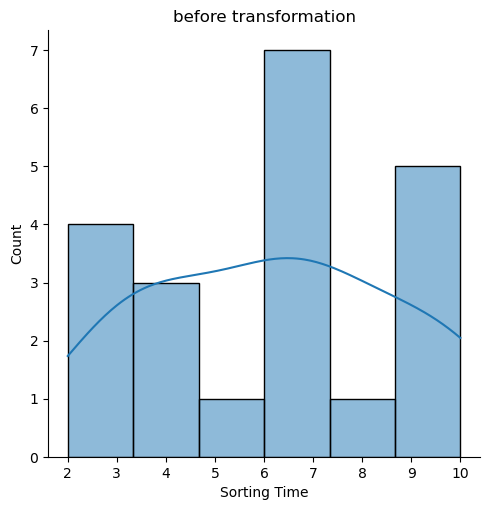

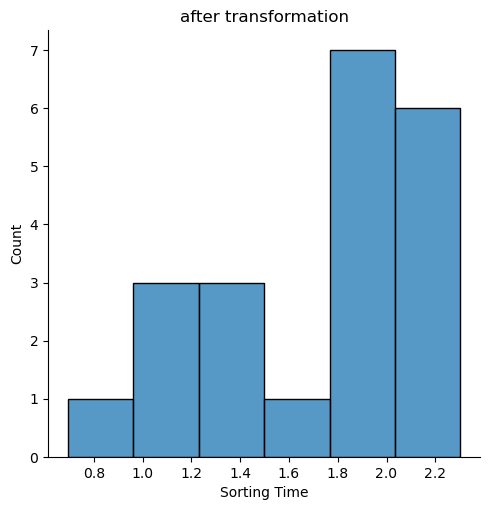

In [18]:
#for sorting time

sns.displot(df['Sorting Time'],bins=6,kde=True)
plt.title('before transformation')
sns.displot(np.log(df['Sorting Time']))
plt.title('after transformation')


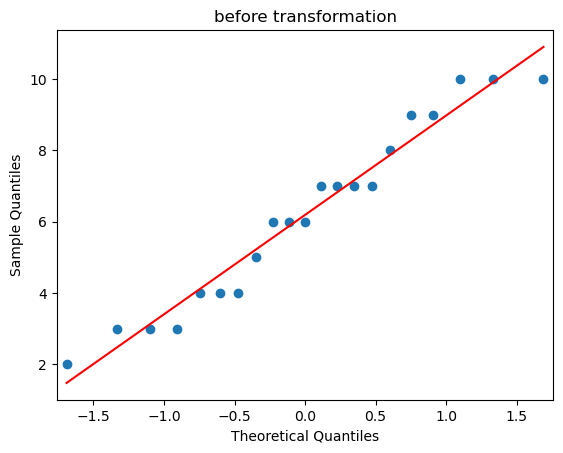

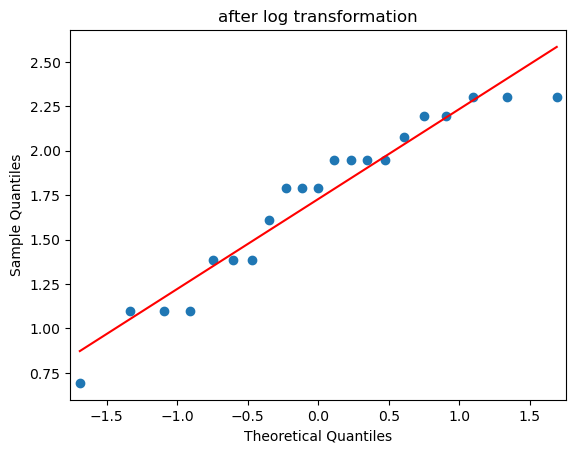

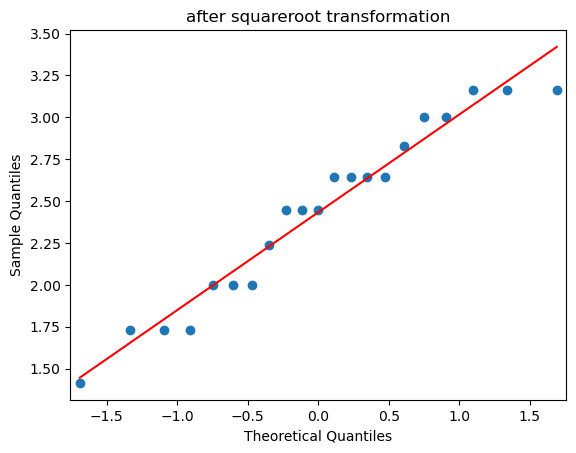

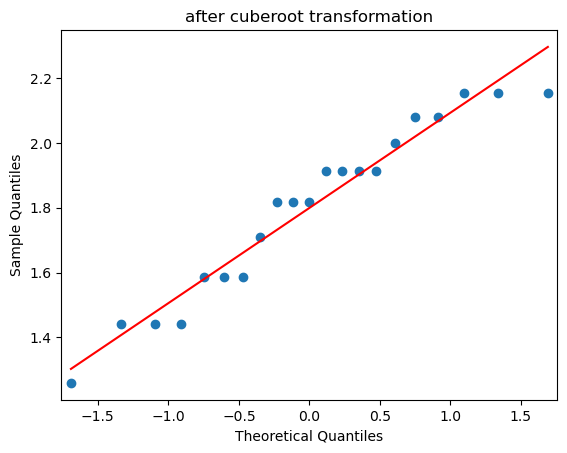

In [19]:
import statsmodels.api as smf
smf.qqplot(df['Sorting Time'],line='r')
plt.title('before transformation')
smf.qqplot(np.log(df['Sorting Time']),line='r')
plt.title('after log transformation')
smf.qqplot(np.sqrt(df['Sorting Time']),line='r')
plt.title('after squareroot transformation')
smf.qqplot(np.cbrt(df['Sorting Time']),line='r')
plt.title('after cuberoot transformation')
plt.show()

In [20]:
#model fitting
import statsmodels.formula.api as sm
model=sm.ols('Delivery_Time~Sorting_Time', data = df1).fit()
model.summary()
square_root=sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)',data=df1).fit()
square_root.summary()
cube_model=sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)',data=df1).fit()
cube_model.summary()
log_model=sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)',data=df1).fit()
log_model.summary()
model.params
print(model.tvalues,'/n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 /n Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [21]:
#with log transformation
predicted=pd.DataFrame()
predicted['Sorting_Time']=df1.Sorting_Time
predicted['Delivery_Time']=df1.Delivery_Time
predicted['predicted_delivery_time']=pd.DataFrame(np.exp(log_model.predict(predicted)))
predicted

,Sorting_Time,Delivery_Time,predicted_delivery_time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [22]:
#with original model
predicted1=pd.DataFrame()
predicted1['Sorting_Time']=df1.Sorting_Time
predicted1['Delivery_Time']=df1.Delivery_Time
predicted1['predicted_delivery_time']=pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1


,Sorting_Time,Delivery_Time,predicted_delivery_time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
